<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [ ]:
print(os.getcwd())

/content


In [ ]:
os.chdir('/content/drive/MyDrive/Statistical_NLP')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Statistical_NLP'

In [ ]:
products_df = pd.read_csv('product_data.csv')

In [ ]:
reviews_df = pd.read_csv('reviews.csv')

In [ ]:
products_df.head()

asin     brand                                              title  \
0  B0000SX2UC       NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  B0009N5L7K  Motorola                                Motorola I265 phone   
2  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
3  B001AO4OUC  Motorola              Motorola i335 Cell Phone Boost Mobile   
4  B001DCJAJG  Motorola      Motorola V365 no contract cellular phone AT&T   

                                                 url  \
0  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1  https://www.amazon.com/Motorola-i265-I265-phon...   
2  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
3  https://www.amazon.com/Motorola-i335-Phone-Boo...   
4  https://www.amazon.com/Motorola-V365-contract-...   

                                               image    rating  \
0  https://m.media-amazon.com/images/I/2143EBQ210... 3.0000000   
1  https://m.media-amazon.com/images/I/419WBAVDAR... 3.0000000   
2  https://m.media-amazon.com/images/I/71b+q3ydkI... 2.7000000   
3  https://m.media-amazon.com/images/I/710UO8gdT+... 3.3000000   
4  https://m.media-amazon.com/images/I/61LYNCVrrK... 3.1000000   

                                           reviewUrl  totalReviews  \
0  https://www.amazon.com/product-reviews/B0000SX2UC            14   
1  https://www.amazon.com/product-reviews/B0009N5L7K             7   
2  https://www.amazon.com/product-reviews/B000SKTZ0S            22   
3  https://www.amazon.com/product-reviews/B001AO4OUC            21   
4  https://www.amazon.com/product-reviews/B001DCJAJG            12   

        price  originalPrice  
0   0.0000000      0.0000000  
1  49.9500000      0.0000000  
2  99.9900000      0.0000000  
3   0.0000000      0.0000000  
4 149.9900000      0.0000000

In [ ]:
reviews_df.head()

asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...     1.0000000  
1  Due to a software issue between Nokia and Spri...    17.0000000  
2  This is a great, reliable phone. I also purcha...     5.0000000  
3  I love the phone and all, because I really did...     1.0000000  
4  The phone has been great for every purpose it ...     1.0000000

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [ ]:
products_df.drop(['url','reviewUrl','image'],axis=1,inplace=True)

In [ ]:
products_df.drop(['title'],axis=1,inplace=True)

In [ ]:
products_df.columns

Index(['asin', 'brand', 'rating', 'totalReviews', 'price', 'originalPrice'], dtype='object')

In [ ]:
products_df.head()

asin     brand    rating  totalReviews       price  originalPrice
0  B0000SX2UC       NaN 3.0000000            14   0.0000000      0.0000000
1  B0009N5L7K  Motorola 3.0000000             7  49.9500000      0.0000000
2  B000SKTZ0S  Motorola 2.7000000            22  99.9900000      0.0000000
3  B001AO4OUC  Motorola 3.3000000            21   0.0000000      0.0000000
4  B001DCJAJG  Motorola 3.1000000            12 149.9900000      0.0000000

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [ ]:
products_df.describe(include='all')

asin    brand      rating  totalReviews       price  \
count          720      716 720.0000000   720.0000000 720.0000000   
unique         720       10         nan           nan         nan   
top     B07N91S9MW  Samsung         nan           nan         nan   
freq             1      346         nan           nan         nan   
mean           NaN      NaN   3.7137500   105.6791667 234.9489306   
std            NaN      NaN   0.7160138   167.6011014 200.0084407   
min            NaN      NaN   1.0000000     1.0000000   0.0000000   
25%            NaN      NaN   3.3000000     7.0000000  97.5125000   
50%            NaN      NaN   3.8000000    32.0000000 188.9750000   
75%            NaN      NaN   4.1000000   122.2500000 336.7250000   
max            NaN      NaN   5.0000000   983.0000000 999.9900000   

        originalPrice  
count     720.0000000  
unique            nan  
top               nan  
freq              nan  
mean       63.6907778  
std       172.4053696  
min         0.0000000  
25%         0.0000000  
50%         0.0000000  
75%         0.0000000  
max       999.9900000

In [ ]:
reviews_df.describe(include='all')

asin             name        rating               date verified  \
count        67986            67984 67986.0000000              67986    67986   
unique         720            47323           nan               2983        2   
top     B00F2SKPIM  Amazon Customer           nan  December 11, 2019     True   
freq           981             6507           nan                234    61225   
mean           NaN              NaN     3.8079163                NaN      NaN   
std            NaN              NaN     1.5829058                NaN      NaN   
min            NaN              NaN     1.0000000                NaN      NaN   
25%            NaN              NaN     3.0000000                NaN      NaN   
50%            NaN              NaN     5.0000000                NaN      NaN   
75%            NaN              NaN     5.0000000                NaN      NaN   
max            NaN              NaN     5.0000000                NaN      NaN   

             title   body  helpfulVotes  
count        67972  67965 27215.0000000  
unique       41489  59811           nan  
top     Five Stars   Good           nan  
freq          6043    303           nan  
mean           NaN    NaN     8.2296895  
std            NaN    NaN    31.9548772  
min            NaN    NaN     1.0000000  
25%            NaN    NaN     1.0000000  
50%            NaN    NaN     2.0000000  
75%            NaN    NaN     5.0000000  
max            NaN    NaN   990.0000000

### 4.3 From the above statistical summry, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

> There are 720 unique products

> Top brand is Samsung

> Top title is 'Five Stars'

> Ratings range from 1  to 5

> Price range from 0 to 999. price 0 means it could probably be a replacement within warranty

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

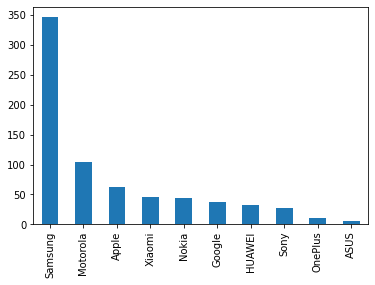

In [ ]:
products_df['brand'].value_counts().plot(kind='bar')

Almost 50% of the ratings are for Samsung

### 4.5 Display average rating per brand

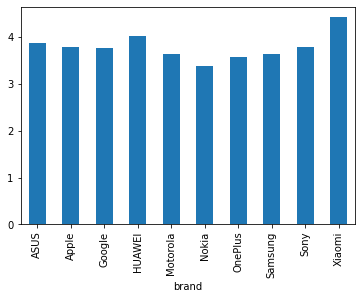

In [ ]:
products_df.groupby('brand').mean()['rating'].plot(kind='bar')

In [ ]:
products_df.groupby('brand').mean()['rating']

brand
ASUS       3.8600000
Apple      3.7825397
Google     3.7710526
HUAWEI     4.0218750
Motorola   3.6438095
Nokia      3.3863636
OnePlus    3.5800000
Samsung    3.6326590
Sony       3.7888889
Xiaomi     4.4152174
Name: rating, dtype: float64

### 4.6 Display average price per brand

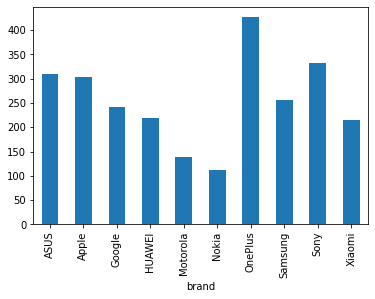

In [ ]:
products_df.groupby('brand').mean()['price'].plot(kind='bar')

In [ ]:
products_df.groupby('brand').mean()['price']

brand
ASUS       309.6860000
Apple      303.5811111
Google     241.8676316
HUAWEI     218.8290625
Motorola   139.1210476
Nokia      111.4438636
OnePlus    426.1960000
Samsung    256.5272543
Sony       332.7248148
Xiaomi     214.9676087
Name: price, dtype: float64

### 4.7 Display average 'totalReviews' per brand

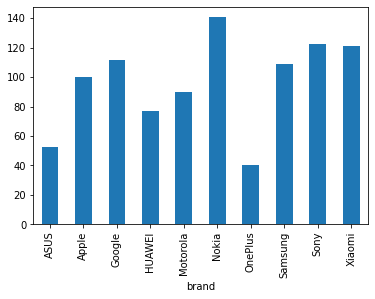

In [ ]:
products_df.groupby('brand').mean()['totalReviews'].plot(kind='bar')

In [ ]:
products_df.groupby('brand').mean()['totalReviews']

brand
ASUS        52.6000000
Apple      100.2380952
Google     111.5263158
HUAWEI      77.0937500
Motorola    89.7047619
Nokia      140.5000000
OnePlus     40.6000000
Samsung    108.9624277
Sony       122.6666667
Xiaomi     121.1739130
Name: totalReviews, dtype: float64

From the above two graphs we see that Nokia has more number of reviews and has lesser average rating. This means maybe more people are dissatisfied with Nokia.

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [ ]:
df=pd.merge(products_df,reviews_df, on='asin', how='inner')

In [ ]:
df.shape

(67986, 13)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [ ]:
df.rename(columns={'rating_x':'user_rating','title_x':'review_title','title_y':'item_title','rating_y':'overall_rating'},inplace=True)

In [ ]:
df.columns

Index(['asin', 'brand', 'user_rating', 'totalReviews', 'price',
       'originalPrice', 'name', 'overall_rating', 'date', 'verified', 'title',
       'body', 'helpfulVotes'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [ ]:
df.verified

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14        True
15       False
16       False
17        True
18        True
19       False
20       False
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
30        True
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43        True
44        True
45        True
46        True
47        True
48        True
49        True
50        True
51        True
52        True
53        True
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64        True
65        True
66        

In [ ]:
df_v=df[df['verified']==True]

In [ ]:
df_v.shape

(61225, 13)

### 4.11 Check the number of reviews for various brands and report the brands that have highest number of brands

In [ ]:
df_v.head()

asin     brand  user_rating  totalReviews      price  originalPrice  \
14  B0009N5L7K  Motorola    3.0000000             7 49.9500000      0.0000000   
17  B0009N5L7K  Motorola    3.0000000             7 49.9500000      0.0000000   
18  B0009N5L7K  Motorola    3.0000000             7 49.9500000      0.0000000   
21  B000SKTZ0S  Motorola    2.7000000            22 99.9900000      0.0000000   
22  B000SKTZ0S  Motorola    2.7000000            22 99.9900000      0.0000000   

                 name  overall_rating                date  verified  \
14      Marcel Thomas               1       March 5, 2016      True   
17     Stephen Cahill               1   December 20, 2016      True   
18              Mihir               5   December 13, 2009      True   
21             Thomas               4  September 17, 2010      True   
22  Kei, San Jose, CA               1        May 13, 2017      True   

                                                title  \
14                                       Stupid phone   
17                                      Phones locked   
18                                  Excellent product   
21                                          Nice, but   
22  It seems it doesn't work with the existing AT&...   

                                                 body  helpfulVotes  
14                           DON'T BUY OUT OF SERVICE           nan  
17  1 star because the phones locked so I have to ...           nan  
18  The product has been very good. I had used thi...           nan  
21  I bought this phone to replace an LG phone tha...           nan  
22  I purchased this phone for my AT&T phone repla...           nan

In [ ]:
df_v.groupby('brand').count()

asin  user_rating  totalReviews  price  originalPrice   name  \
brand                                                                     
ASUS        206          206           206    206            206    206   
Apple      4876         4876          4876   4876           4876   4876   
Google     3163         3163          3163   3163           3163   3163   
HUAWEI     2019         2019          2019   2019           2019   2019   
Motorola   7714         7714          7714   7714           7714   7714   
Nokia      4878         4878          4878   4878           4878   4877   
OnePlus     304          304           304    304            304    304   
Samsung   31020        31020         31020  31020          31020  31019   
Sony       2691         2691          2691   2691           2691   2691   
Xiaomi     4207         4207          4207   4207           4207   4207   

          overall_rating   date  verified  title   body  helpfulVotes  
brand                                                                  
ASUS                 206    206       206    206    206           101  
Apple               4876   4876      4876   4875   4876          1631  
Google              3163   3163      3163   3163   3162          1279  
HUAWEI              2019   2019      2019   2019   2019           881  
Motorola            7714   7714      7714   7714   7713          3010  
Nokia               4878   4878      4878   4878   4877          2020  
OnePlus              304    304       304    304    304           141  
Samsung            31020  31020     31020  31007  31005         11198  
Sony                2691   2691      2691   2691   2691          1352  
Xiaomi              4207   4207      4207   4207   4207          1452

Samsung has the highest number of ratings

In [ ]:
df_v['brand'].isnull().sum()

147

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [ ]:
df_v.columns

Index(['asin', 'brand', 'user_rating', 'totalReviews', 'price',
       'originalPrice', 'name', 'overall_rating', 'date', 'verified', 'title',
       'body', 'helpfulVotes'],
      dtype='object')

In [ ]:
df_v.drop(df_v.columns.difference(['brand','body','price','user_rating','title']),inplace=True,axis=1)

In [ ]:
df_v.columns

Index(['brand', 'user_rating', 'price', 'title', 'body'], dtype='object')

In [ ]:
df_v.head()

brand  user_rating      price  \
14  Motorola    3.0000000 49.9500000   
17  Motorola    3.0000000 49.9500000   
18  Motorola    3.0000000 49.9500000   
21  Motorola    2.7000000 99.9900000   
22  Motorola    2.7000000 99.9900000   

                                                title  \
14                                       Stupid phone   
17                                      Phones locked   
18                                  Excellent product   
21                                          Nice, but   
22  It seems it doesn't work with the existing AT&...   

                                                 body  
14                           DON'T BUY OUT OF SERVICE  
17  1 star because the phones locked so I have to ...  
18  The product has been very good. I had used thi...  
21  I bought this phone to replace an LG phone tha...  
22  I purchased this phone for my AT&T phone repla...

In [ ]:
sorted(df_v['price'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

### 4.13 Perform univariate analysis. Check distribution of price, user_rating

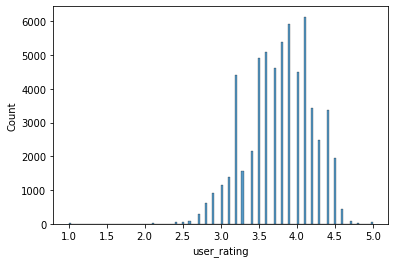

In [ ]:
sns.histplot(df_v['user_rating'])

It is skewed towards left

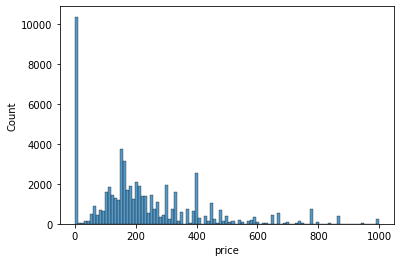

In [ ]:
sns.histplot(df_v['price'])

In [ ]:
df_v[df_v['price']==0]

brand  user_rating     price  \
43     Motorola    3.3000000 0.0000000   
44     Motorola    3.3000000 0.0000000   
45     Motorola    3.3000000 0.0000000   
46     Motorola    3.3000000 0.0000000   
47     Motorola    3.3000000 0.0000000   
48     Motorola    3.3000000 0.0000000   
49     Motorola    3.3000000 0.0000000   
50     Motorola    3.3000000 0.0000000   
51     Motorola    3.3000000 0.0000000   
52     Motorola    3.3000000 0.0000000   
53     Motorola    3.3000000 0.0000000   
79      Samsung    3.0000000 0.0000000   
108     Samsung    2.9000000 0.0000000   
109     Samsung    2.9000000 0.0000000   
110     Samsung    2.9000000 0.0000000   
111     Samsung    2.9000000 0.0000000   
112     Samsung    2.9000000 0.0000000   
113     Samsung    2.9000000 0.0000000   
114     Samsung    2.9000000 0.0000000   
115     Samsung    2.9000000 0.0000000   
116     Samsung    2.9000000 0.0000000   
121     Samsung    2.9000000 0.0000000   
122     Samsung    2.9000000 0.0000000   
123     Samsung    2.9000000 0.0000000   
126    Motorola    2.7000000 0.0000000   
127    Motorola    2.7000000 0.0000000   
128    Motorola    2.7000000 0.0000000   
129    Motorola    2.7000000 0.0000000   
130    Motorola    2.7000000 0.0000000   
131    Motorola    2.7000000 0.0000000   
132    Motorola    2.7000000 0.0000000   
133    Motorola    2.7000000 0.0000000   
134    Motorola    2.7000000 0.0000000   
135    Motorola    2.7000000 0.0000000   
136    Motorola    2.7000000 0.0000000   
137    Motorola    2.7000000 0.0000000   
138    Motorola    2.7000000 0.0000000   
139    Motorola    2.7000000 0.0000000   
140    Motorola    2.7000000 0.0000000   
141    Motorola    2.7000000 0.0000000   
142    Motorola    2.7000000 0.0000000   
143    Motorola    2.7000000 0.0000000   
144    Motorola    2.7000000 0.0000000   
145    Motorola    2.7000000 0.0000000   
146    Motorola    2.7000000 0.0000000   
147    Motorola    2.7000000 0.0000000   
148    Motorola    2.7000000 0.0000000   
149    Motorola    2.7000000 0.0000000   
150    Motorola    2.7000000 0.0000000   
151    Motorola    2.7000000 0.0000000   
152    Motorola    2.7000000 0.0000000   
153    Motorola    2.7000000 0.0000000   
154    Motorola    2.7000000 0.0000000   
155    Motorola    2.7000000 0.0000000   
156    Motorola    2.7000000 0.0000000   
157    Motorola    2.7000000 0.0000000   
158    Motorola    2.7000000 0.0000000   
159    Motorola    2.7000000 0.0000000   
160    Motorola    2.7000000 0.0000000   
161    Motorola    2.7000000 0.0000000   
162    Motorola    2.7000000 0.0000000   
163    Motorola    2.7000000 0.0000000   
164    Motorola    2.7000000 0.0000000   
165    Motorola    2.7000000 0.0000000   
166    Motorola    2.7000000 0.0000000   
167    Motorola    2.7000000 0.0000000   
168    Motorola    2.7000000 0.0000000   
169    Motorola    2.7000000 0.0000000   
170    Motorola    2.7000000 0.0000000   
171    Motorola    2.7000000 0.0000000   
172    Motorola    2.7000000 0.0000000   
173    Motorola    2.7000000 0.0000000   
174    Motorola    2.7000000 0.0000000   
175    Motorola    2.7000000 0.0000000   
176    Motorola    2.7000000 0.0000000   
177    Motorola    2.7000000 0.0000000   
178    Motorola    2.7000000 0.0000000   
179    Motorola    2.7000000 0.0000000   
180    Motorola    2.7000000 0.0000000   
181    Motorola    2.7000000 0.0000000   
182    Motorola    2.7000000 0.0000000   
183    Motorola    2.7000000 0.0000000   
184    Motorola    2.7000000 0.0000000   
185    Motorola    2.7000000 0.0000000   
186    Motorola    2.7000000 0.0000000   
187    Motorola    2.7000000 0.0000000   
188    Motorola    2.7000000 0.0000000   
189    Motorola    2.7000000 0.0000000   
190    Motorola    2.7000000 0.0000000   
191    Motorola    2.7000000 0.0000000   
192    Motorola    2.7000000 0.0000000   
193    Motorola    2.7000000 0.0000000   
194    Motorola    2.7000000 0.0000000   
195    Motorola    2.7000000 0.0000000   
196    Motorola    2

In [ ]:
df_v[df_v['price']==0].shape

(10389, 5)

In [ ]:
df_v[df_v['price']>100].shape

(46980, 5)

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [ ]:
def assign_sentiment(rating):
  if (rating == 3):
    return 0
  elif (rating > 3):
    return 1
  else:
    return -1

df_v['sentiment'] = df_v['user_rating'].apply(lambda x:assign_sentiment(x))

df_v['sentiment'].value_counts()


 1    57967
-1     2098
 0     1160
Name: sentiment, dtype: int64

### 4.15 Check frequency distribution of the 'sentiment'

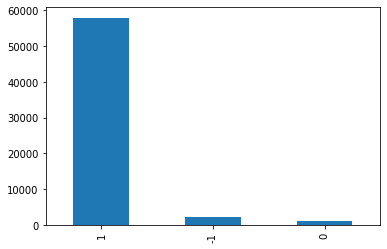

In [ ]:
df_v['sentiment'].value_counts().plot(kind='bar')

Positive sentiments is highly biased

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

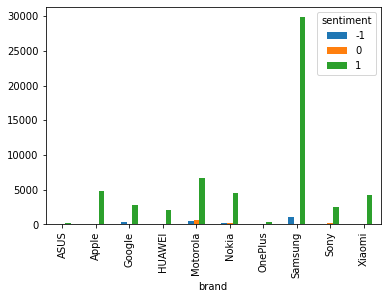

In [ ]:
pd.crosstab(df_v['sentiment'],df['brand']).T.plot(kind='bar')

In [ ]:
pd.crosstab(df_v['sentiment'],df['brand']).T

sentiment    -1    0      1
brand                      
ASUS          1    0    205
Apple        65    0   4811
Google      283   18   2862
HUAWEI        2    1   2016
Motorola    461  578   6675
Nokia       192  217   4469
OnePlus       0    0    304
Samsung    1094  100  29826
Sony          0  246   2445
Xiaomi        0    0   4207

More dissafistied customers are for Motorola and Google

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [ ]:
df_v.head()

brand  user_rating      price  \
14  Motorola    3.0000000 49.9500000   
17  Motorola    3.0000000 49.9500000   
18  Motorola    3.0000000 49.9500000   
21  Motorola    2.7000000 99.9900000   
22  Motorola    2.7000000 99.9900000   

                                                title  \
14                                       Stupid phone   
17                                      Phones locked   
18                                  Excellent product   
21                                          Nice, but   
22  It seems it doesn't work with the existing AT&...   

                                                 body  sentiment  
14                           DON'T BUY OUT OF SERVICE          0  
17  1 star because the phones locked so I have to ...          0  
18  The product has been very good. I had used thi...          0  
21  I bought this phone to replace an LG phone tha...         -1  
22  I purchased this phone for my AT&T phone repla...         -1

In [ ]:
df_v['body'].dtype

dtype('O')

In [ ]:
df_v['body']=df_v['body'].apply(lambda x:str(x).lower())

In [ ]:
df_v.head()

brand  user_rating      price  \
14  Motorola    3.0000000 49.9500000   
17  Motorola    3.0000000 49.9500000   
18  Motorola    3.0000000 49.9500000   
21  Motorola    2.7000000 99.9900000   
22  Motorola    2.7000000 99.9900000   

                                                title  \
14                                       Stupid phone   
17                                      Phones locked   
18                                  Excellent product   
21                                          Nice, but   
22  It seems it doesn't work with the existing AT&...   

                                                 body  sentiment  
14                           don't buy out of service          0  
17  1 star because the phones locked so i have to ...          0  
18  the product has been very good. i had used thi...          0  
21  i bought this phone to replace an lg phone tha...         -1  
22  i purchased this phone for my at&t phone repla...         -1

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [ ]:
df_v['body'] = df_v['body'].replace('[^\w\s]','',regex=True)

In [ ]:
df_v.head()

brand  user_rating      price  \
14  Motorola    3.0000000 49.9500000   
17  Motorola    3.0000000 49.9500000   
18  Motorola    3.0000000 49.9500000   
21  Motorola    2.7000000 99.9900000   
22  Motorola    2.7000000 99.9900000   

                                                title  \
14                                       Stupid phone   
17                                      Phones locked   
18                                  Excellent product   
21                                          Nice, but   
22  It seems it doesn't work with the existing AT&...   

                                                 body  sentiment  
14                            dont buy out of service          0  
17  1 star because the phones locked so i have to ...          0  
18  the product has been very good i had used this...          0  
21  i bought this phone to replace an lg phone tha...         -1  
22  i purchased this phone for my att phone replac...         -1

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_w = set(stopwords.words('english'))

In [ ]:
df_v['body'] = df_v['body'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop_w))

In [ ]:
df_v.head()

brand  user_rating      price  \
14  Motorola    3.0000000 49.9500000   
17  Motorola    3.0000000 49.9500000   
18  Motorola    3.0000000 49.9500000   
21  Motorola    2.7000000 99.9900000   
22  Motorola    2.7000000 99.9900000   

                                                title  \
14                                       Stupid phone   
17                                      Phones locked   
18                                  Excellent product   
21                                          Nice, but   
22  It seems it doesn't work with the existing AT&...   

                                                 body  sentiment  
14                                   dont buy service          0  
17    1 star phones locked pay additional fees unlock          0  
18  product good used cell phone one projects work...          0  
21  bought phone replace lg phone didnt like expec...         -1  
22  purchased phone att phone replacement even tho...         -1

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [ ]:
def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  #return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  return ' '.join([lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(text)])

In [ ]:
lemmatize_text('1 star phones locked pay additional fees unlock')

'1 star phone locked pay additional fee unlock'

In [ ]:
df_v['body'] = df_v['body'].apply(lemmatize_text)

In [ ]:
df_v.head()

brand  user_rating      price  \
14  Motorola    3.0000000 49.9500000   
17  Motorola    3.0000000 49.9500000   
18  Motorola    3.0000000 49.9500000   
21  Motorola    2.7000000 99.9900000   
22  Motorola    2.7000000 99.9900000   

                                                title  \
14                                       Stupid phone   
17                                      Phones locked   
18                                  Excellent product   
21                                          Nice, but   
22  It seems it doesn't work with the existing AT&...   

                                                 body  sentiment  
14                                   dont buy service          0  
17      1 star phone locked pay additional fee unlock          0  
18  product good used cell phone one project worke...          0  
21  bought phone replace lg phone didnt like expec...         -1  
22  purchased phone att phone replacement even tho...         -1

In [ ]:
df_v.shape

(61225, 6)

In [ ]:
df_new = df_v[:int(df_v.shape[0]*.2)]

In [ ]:
df_new.shape

(12245, 6)

### 5.5 Write a function to check word frequency of the text

### 5.6 Check word frequency of review having top ratings (sentimet = 1) and display output of few samples

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vec = TfidfVectorizer()

In [ ]:
tfidif_data = tfidf_vec.fit_transform(df_new['body'])

In [ ]:
tfidif_data.shape

(12245, 14501)

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [ ]:
x = tfidif_data

In [ ]:
y = df_new['sentiment']

### 5.9 Split the data into Train & Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=95)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_l = RandomForestClassifier()
rf_l.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(rf_l.score(x_train,y_train))

0.9908526625285854


In [ ]:
print(rf_l.score(x_test,y_test))

0.9190071848465056


## 7. Write your conclusion

Given the product and ratings data, We are able to do text analytics and then predict the Sentiment using the independent features(transformed body using tf-idf) with Random Forest Classifier and able to get a training accuracy of 99.08% and test accuracy 91.9%